In [1]:
import os #interacting with current OS
from collections import defaultdict #Default value instead of key error
import pandas as pd # Data manipulation and analysis
import numpy as np # Scientific computing and data analysis
import matplotlib.pyplot as plt # Creating visualizations
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_file = os.path.join('kddcup99_csv.csv')
print(data_file)

kddcup99_csv.csv


In [3]:
# KDD Cup 1999 Dataset is used

header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type']
print(len(header_names))
print(header_names)

42
['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type']


In [4]:
df = pd.read_csv(data_file, names=header_names)
print(df)

        duration protocol_type service flag  src_bytes  dst_bytes  land  \
0              0           tcp    http   SF        181       5450     0   
1              0           tcp    http   SF        239        486     0   
2              0           tcp    http   SF        235       1337     0   
3              0           tcp    http   SF        219       1337     0   
4              0           tcp    http   SF        217       2032     0   
...          ...           ...     ...  ...        ...        ...   ...   
494015         0           tcp    http   SF        310       1881     0   
494016         0           tcp    http   SF        282       2286     0   
494017         0           tcp    http   SF        203       1200     0   
494018         0           tcp    http   SF        291       1200     0   
494019         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                    0       0    0

In [5]:
training_df = df.sample(frac=0.8, random_state=25)
testing_df = df.drop(training_df.index)

In [6]:
col_names = np.array(header_names)

# Differentiating between nominal, binary, and numeric features

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

print("Nominal Columns:",nominal_cols)
print("Binary Columns:",binary_cols)
print("Numeric Columns:",numeric_cols)

Nominal Columns: ['protocol_type', 'service', 'flag']
Binary Columns: ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']
Numeric Columns: ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [7]:
#attacks.txt maps 22 different attacks to be analysed in intrusion detection to 1 of 4 categories

category = defaultdict(list)
category['benign'].append('normal')

with open('attacks.txt', 'r') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)
       
attack_mapping = dict((v,k) for k in category for v in category[k])
print(attack_mapping)

{'normal': 'benign', 'back': 'dos', 'land': 'dos', 'neptune': 'dos', 'pod': 'dos', 'smurf': 'dos', 'teardrop': 'dos', 'buffer_overflow': 'u2r', 'loadmodule': 'u2r', 'perl': 'u2r', 'rootkit': 'u2r', 'ftp_write': 'r2l', 'guess_passwd': 'r2l', 'imap': 'r2l', 'multihop': 'r2l', 'phf': 'r2l', 'spy': 'r2l', 'warezclient': 'r2l', 'warezmaster': 'r2l', 'ipsweep': 'probe', 'nmap': 'probe', 'portsweep': 'probe', 'satan': 'probe'}


In [8]:
training_df.dropna(inplace=True)

In [9]:
print(len(training_df))

395216


In [10]:
print(len(testing_df))

98804


In [11]:
testing_df['attack_category'] = testing_df['attack_type'].map(lambda x: attack_mapping.get(x))

In [12]:
print(testing_df['attack_category'])

0         benign
5         benign
12        benign
14        benign
20        benign
           ...  
493992    benign
494001    benign
494002    benign
494005    benign
494015    benign
Name: attack_category, Length: 98804, dtype: object


In [13]:
training_df['attack_category'] = training_df['attack_type'].map(lambda x: attack_mapping[x])

In [14]:
print(training_df['attack_category'])

237949       dos
294042       dos
282307       dos
1937      benign
169983       dos
           ...  
68779        dos
61641        dos
453913    benign
144898    benign
212950       dos
Name: attack_category, Length: 395216, dtype: object


In [15]:
training_attack_types = training_df['attack_type'].value_counts()
training_attack_cats = training_df['attack_category'].value_counts()
print("Training Category Count\n",training_attack_cats)

testing_attack_types = testing_df['attack_type'].value_counts()
testing_attack_cats = testing_df['attack_category'].value_counts()
print("\nTesting Category Count\n",testing_attack_cats)

Training Category Count
 dos       313231
benign     77749
probe       3271
r2l          923
u2r           42
Name: attack_category, dtype: int64

Testing Category Count
 dos       78227
benign    19528
probe       836
r2l         203
u2r          10
Name: attack_category, dtype: int64


<AxesSubplot:title={'center':'BARCHART SHOWING THE COUNT FOR EACH ATTACK TYPE IN KDD TRAINING DATASET'}, xlabel='ATTACK TYPES', ylabel='NUMBER OF SAMPLES'>

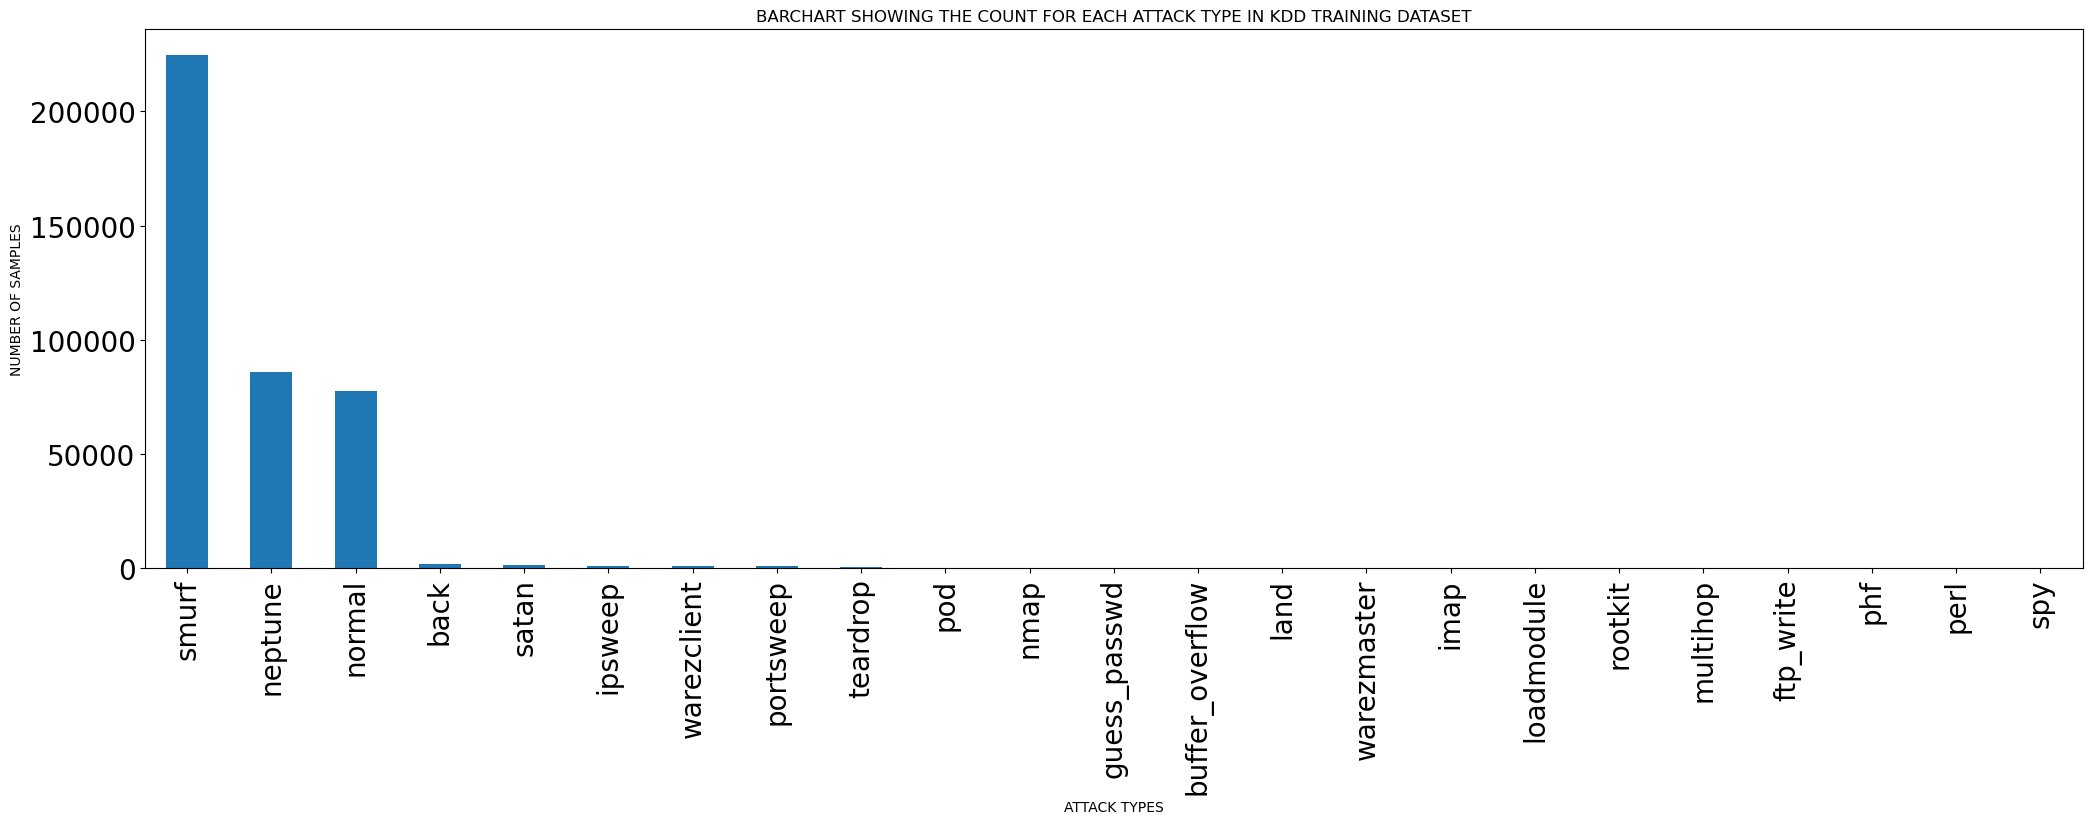

In [16]:
training_attack_types.plot(kind='bar', figsize=(25,7), fontsize=20, title = 'BARCHART SHOWING THE COUNT FOR EACH ATTACK TYPE IN KDD TRAINING DATASET', xlabel= 'ATTACK TYPES', ylabel= 'NUMBER OF SAMPLES')

<AxesSubplot:title={'center':'BARCHART SHOWING THE COUNT FOR EACH ATTACK CATEGORY IN KDD TRAINING DATASET'}, xlabel='ATTACK CATEGORY', ylabel='NUMBER OF SAMPLES'>

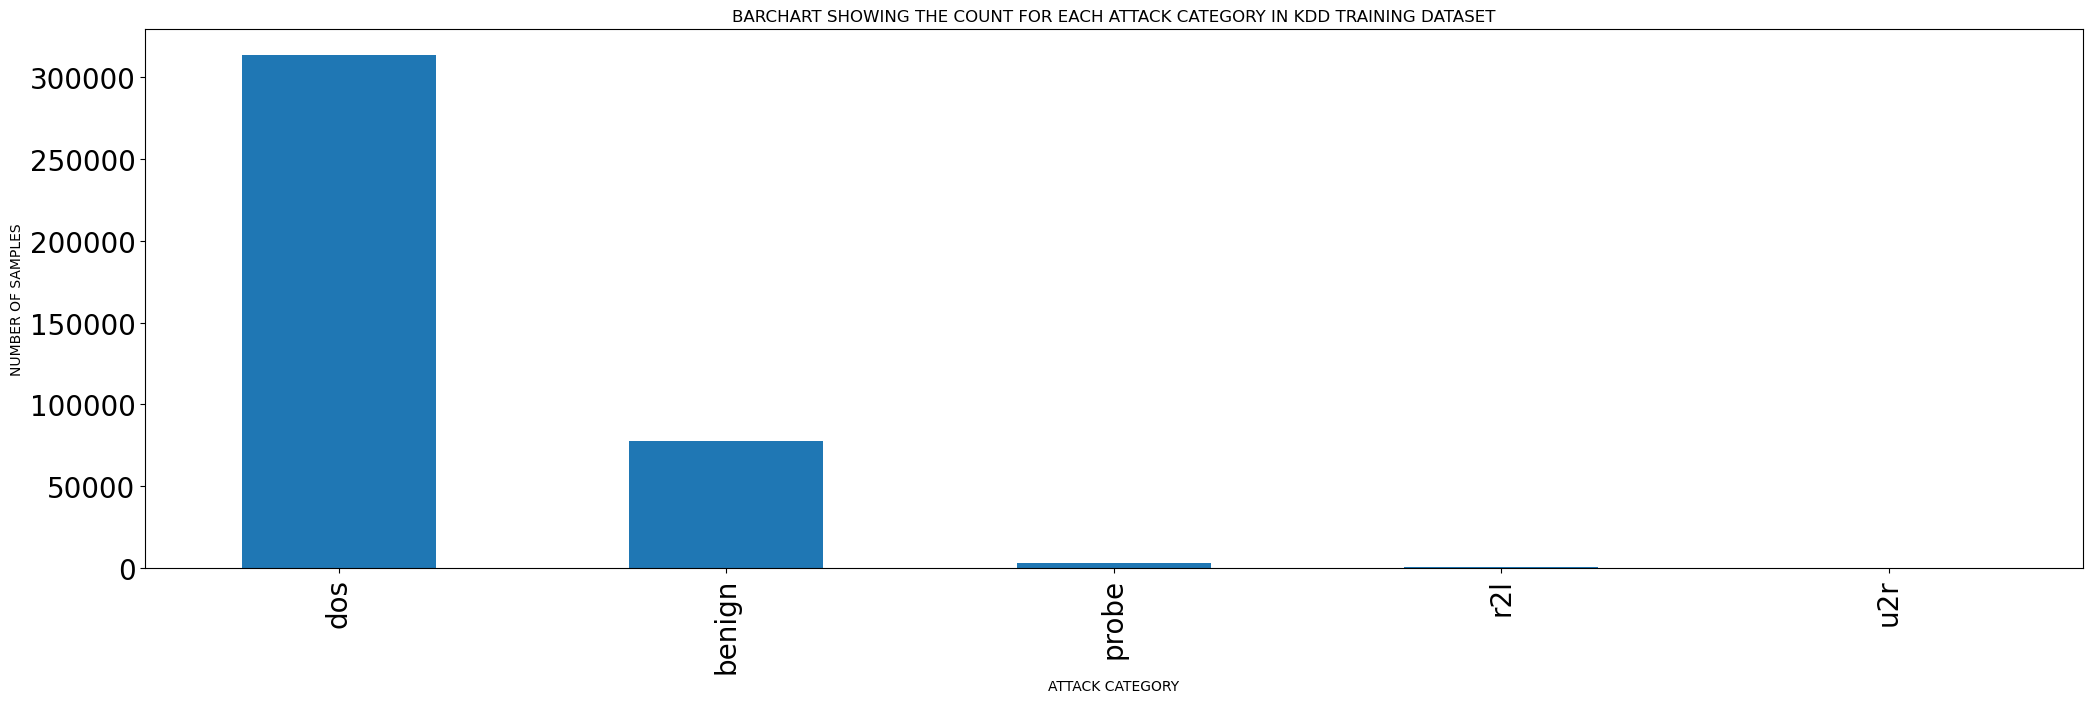

In [17]:
training_attack_cats.plot(kind='bar', figsize=(25,7), fontsize=20, title = 'BARCHART SHOWING THE COUNT FOR EACH ATTACK CATEGORY IN KDD TRAINING DATASET',  xlabel= 'ATTACK CATEGORY', ylabel= 'NUMBER OF SAMPLES')

<AxesSubplot:title={'center':'BARCHART SHOWING THE COUNT FOR EACH ATTACK TYPE IN KDD TRAINING DATASET'}, xlabel='ATTACK TYPES', ylabel='NUMBER OF SAMPLES'>

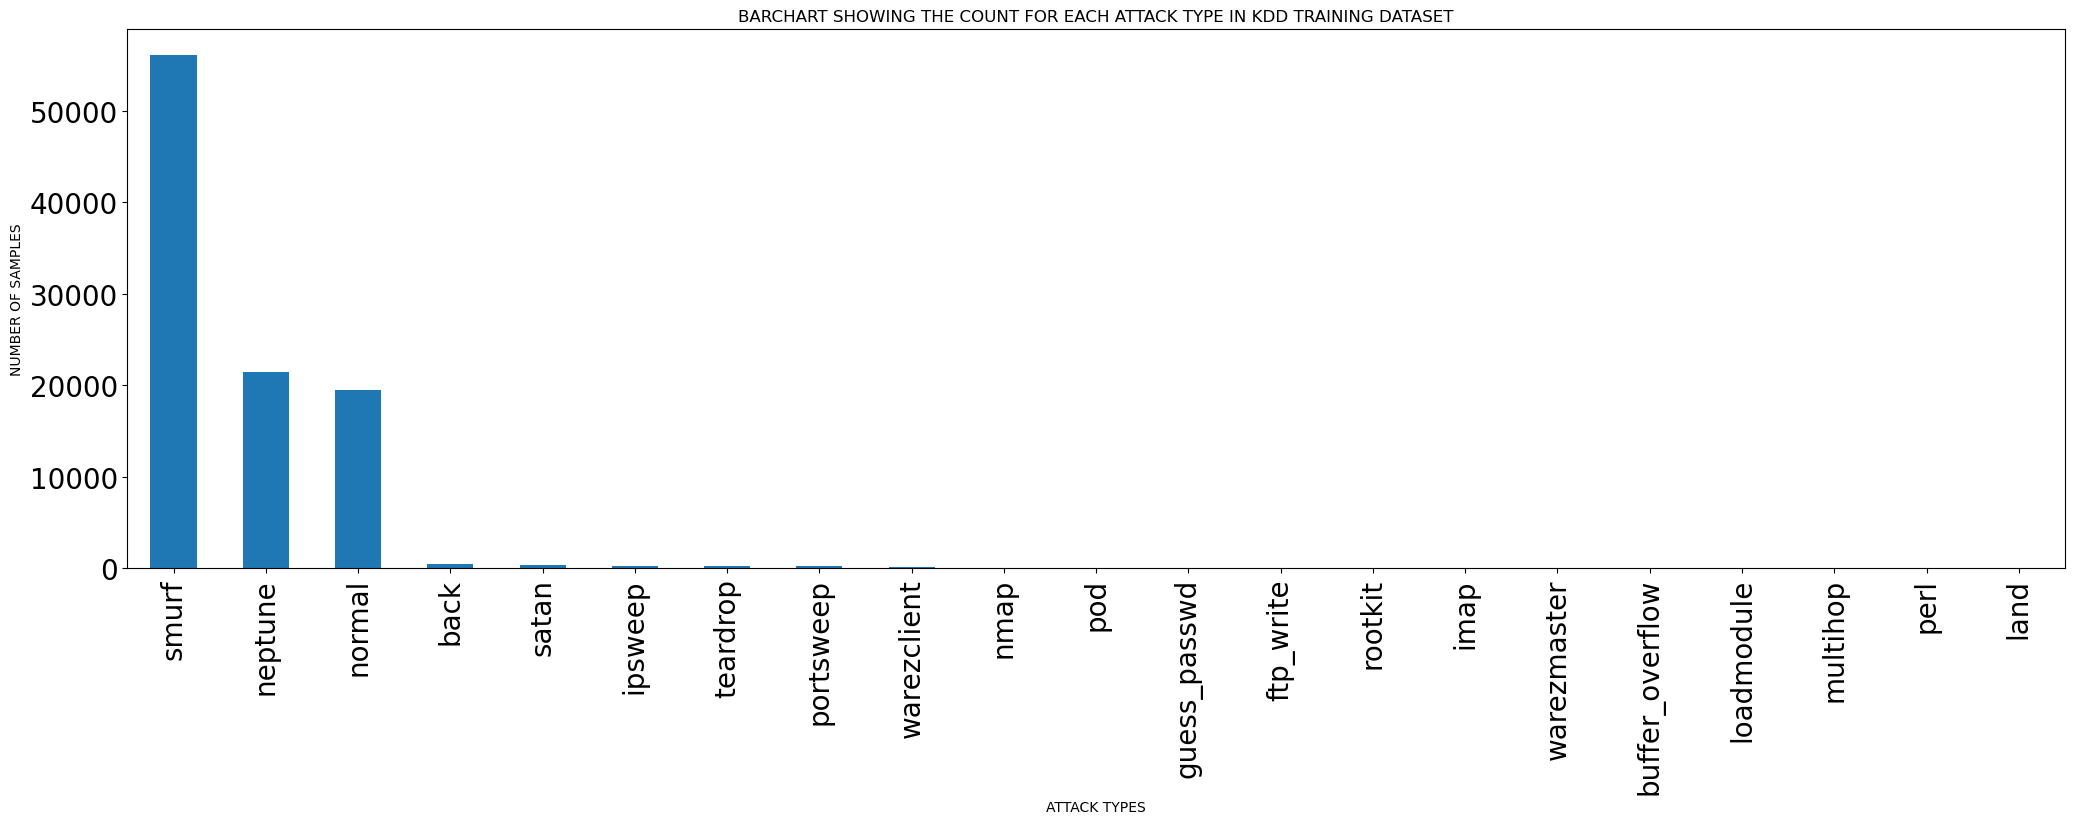

In [18]:
testing_attack_types.plot(kind='bar', figsize=(25,7), fontsize=20, title = 'BARCHART SHOWING THE COUNT FOR EACH ATTACK TYPE IN KDD TRAINING DATASET', xlabel= 'ATTACK TYPES', ylabel= 'NUMBER OF SAMPLES')

<AxesSubplot:title={'center':'BARCHART SHOWING THE COUNT FOR EACH ATTACK CATEGORY IN KDD TRAINING DATASET'}, xlabel='ATTACK CATEGORY', ylabel='NUMBER OF SAMPLES'>

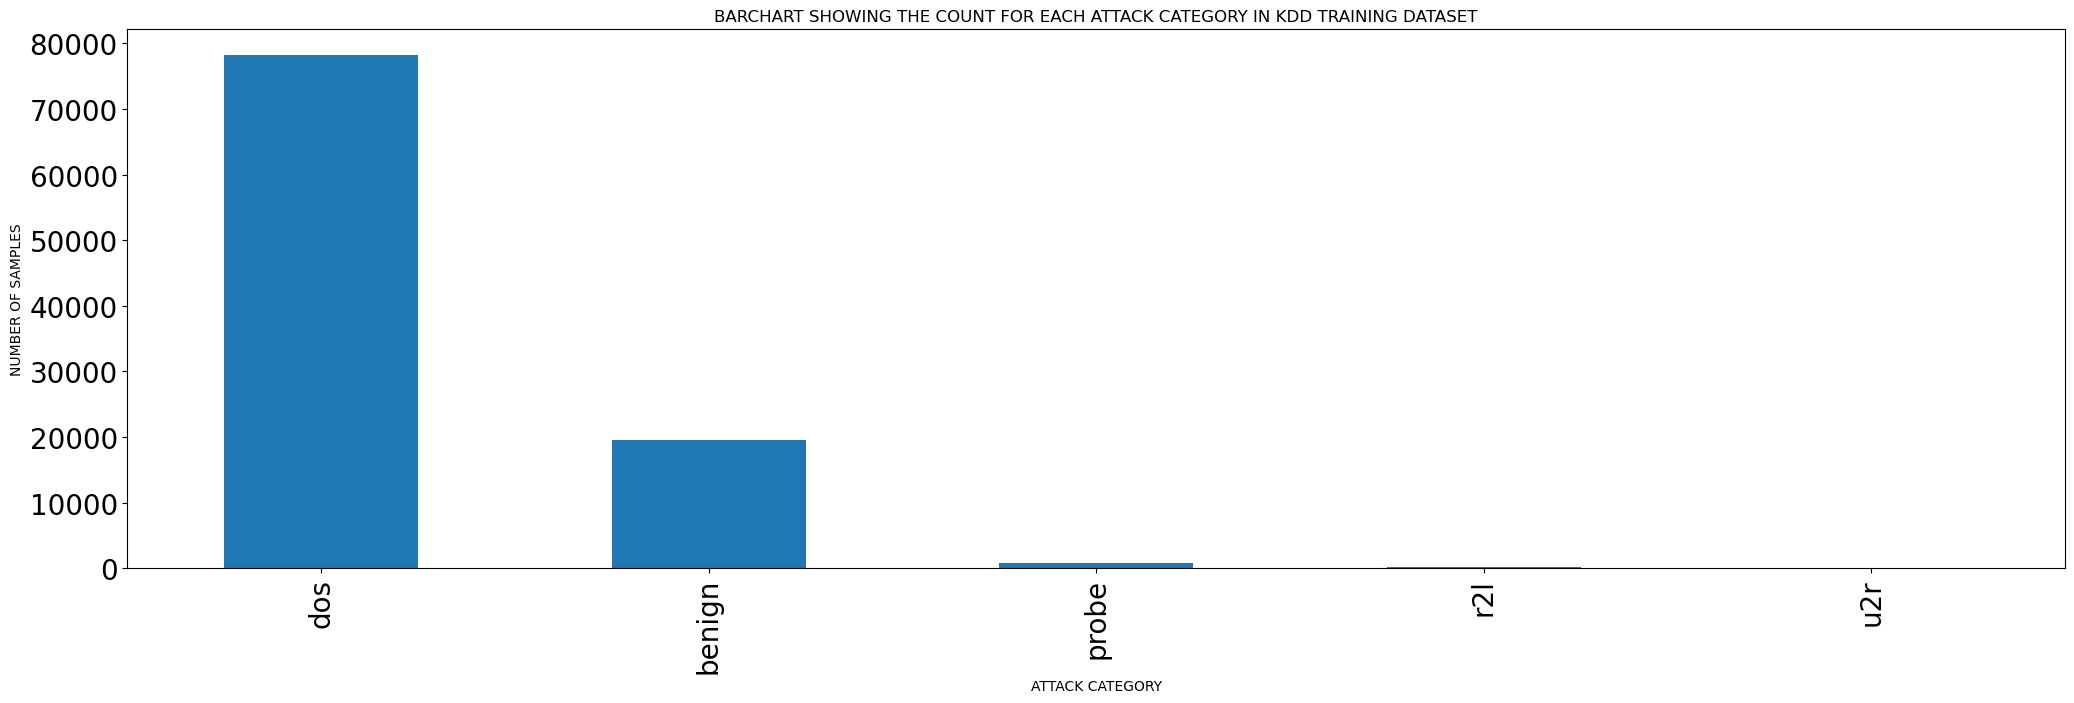

In [19]:
testing_attack_cats.plot(kind='bar', figsize=(25,7), fontsize=20, title = 'BARCHART SHOWING THE COUNT FOR EACH ATTACK CATEGORY IN KDD TRAINING DATASET',  xlabel= 'ATTACK CATEGORY', ylabel= 'NUMBER OF SAMPLES')


In [20]:
#Analyse binary features. Observed deviation in su_attempted feature with max value 2.0
print(training_df[binary_cols].describe().transpose())

                   count      mean       std  min  25%  50%  75%  max
land            395216.0  0.000053  0.007289  0.0  0.0  0.0  0.0  1.0
logged_in       395216.0  0.148104  0.355203  0.0  0.0  0.0  0.0  1.0
root_shell      395216.0  0.000119  0.010905  0.0  0.0  0.0  0.0  1.0
su_attempted    395216.0  0.000033  0.007289  0.0  0.0  0.0  0.0  2.0
is_host_login   395216.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
is_guest_login  395216.0  0.001407  0.037481  0.0  0.0  0.0  0.0  1.0


In [21]:
#Analyze the distribution of su_attempted
training_df.groupby(['su_attempted']).size()

su_attempted
0    395207
1         5
2         4
dtype: int64

In [22]:
# fix the discrepancy by assuming that su_attempted=2 -> su_attempted=0

training_df['su_attempted'].replace(2, 0, inplace=True)
testing_df['su_attempted'].replace(2, 0, inplace=True)
training_df.groupby(['su_attempted']).size()

su_attempted
0    395211
1         5
dtype: int64

In [23]:
# num_outbound_cmds column only takes on one value

training_df.groupby(['num_outbound_cmds']).size()

num_outbound_cmds
0    395216
dtype: int64

In [24]:
# num_outbound_cmds is not required feature for intrusion detection, hence column is deleted

training_df.drop('num_outbound_cmds', axis = 1, inplace=True)
testing_df.drop('num_outbound_cmds', axis = 1, inplace=True)
numeric_cols.remove('num_outbound_cmds')

In [25]:
"""Data Preparation and Scaling"""

train_Y = training_df['attack_category']
train_x_raw = training_df.drop(['attack_category','attack_type'], axis=1)
test_Y = testing_df['attack_category']
test_x_raw = testing_df.drop(['attack_category','attack_type'], axis=1)

In [26]:
combined_df_raw = pd.concat([train_x_raw, test_x_raw])
print(combined_df_raw)

        duration protocol_type service flag  src_bytes  dst_bytes  land  \
237949         0          icmp   ecr_i   SF       1032          0     0   
294042         0          icmp   ecr_i   SF       1032          0     0   
282307         0          icmp   ecr_i   SF       1032          0     0   
1937           0           tcp    http   SF        270        597     0   
169983         0          icmp   ecr_i   SF       1032          0     0   
...          ...           ...     ...  ...        ...        ...   ...   
493992         0           tcp    http   SF        285      34557     0   
494001         0           tcp    http   SF        215       2649     0   
494002         0           tcp    http   SF        341        326     0   
494005         0           tcp    http   SF        235        501     0   
494015         0           tcp    http   SF        310       1881     0   

        wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
237949             

In [27]:
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)
print(combined_df.columns)
print("\n",combined_df.columns.tolist())

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype='object', length=114)

 ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',

In [28]:
train_x = combined_df[:len(train_x_raw)]
test_x = combined_df[len(train_x_raw):]

In [29]:
# Store dummy variable feature names
dummy_variables = list(set(train_x)-set(combined_df_raw))
print(dummy_variables)

['service_tim_i', 'service_klogin', 'service_ecr_i', 'service_X11', 'service_tftp_u', 'service_discard', 'flag_S3', 'service_whois', 'flag_RSTO', 'service_red_i', 'service_netbios_ns', 'flag_S0', 'service_sql_net', 'service_auth', 'service_daytime', 'service_hostnames', 'service_other', 'service_urp_i', 'service_mtp', 'service_ldap', 'service_pm_dump', 'service_ftp', 'service_uucp', 'service_pop_3', 'service_remote_job', 'service_telnet', 'service_ctf', 'service_csnet_ns', 'service_nntp', 'service_pop_2', 'flag_RSTOS0', 'service_ftp_data', 'service_courier', 'service_eco_i', 'service_systat', 'service_domain_u', 'service_urh_i', 'flag_SH', 'service_exec', 'service_link', 'service_smtp', 'service_login', 'service_kshell', 'service_netstat', 'service_sunrpc', 'service_bgp', 'service_finger', 'service_gopher', 'service_shell', 'service_domain', 'service_supdup', 'flag_SF', 'service_time', 'flag_S1', 'service_uucp_path', 'protocol_type_udp', 'service_http_443', 'service_rje', 'service_priv

In [30]:
#execute the commands in console
train_x.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
count,395216.000000,3.952160e+05,3.952160e+05,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,...,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000
mean,47.451781,3.384401e+03,8.762504e+02,0.000053,0.006331,0.000015,0.034718,0.000154,0.148104,0.010690,...,0.054310,0.001164,0.000023,0.001834,0.176190,0.000116,0.000056,0.000020,0.766055,0.000223
std,702.836807,1.104482e+06,3.369298e+04,0.007289,0.133467,0.005952,0.784902,0.016143,0.355203,1.967298,...,0.226628,0.034096,0.004772,0.042791,0.380982,0.010788,0.007461,0.004499,0.423338,0.014920
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
train_x['duration'].describe()

count    395216.000000
mean         47.451781
std         702.836807
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       58329.000000
Name: duration, dtype: float64

In [32]:
# StandardScaler on the single 'duration' feature
from sklearn.preprocessing import StandardScaler

durations = train_x['duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()

count    3.952160e+05
mean     1.439096e-15
std      1.000001e+00
min     -6.751474e-02
25%     -6.751474e-02
50%     -6.751474e-02
75%     -6.751474e-02
max      8.292341e+01
dtype: float64

In [33]:
# StandardScaler applied to all the numeric columns

standard_scaler = StandardScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = standard_scaler.transform(train_x[numeric_cols])

test_x[numeric_cols] = standard_scaler.transform(test_x[numeric_cols])
    
train_x.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
count,3.952160e+05,3.952160e+05,3.952160e+05,395216.000000,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,395216.000000,3.952160e+05,...,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000
mean,1.439096e-15,1.584611e-15,-2.943585e-16,0.000053,-9.207362e-15,3.635459e-15,6.502888e-15,-5.966375e-15,0.148104,-8.881851e-15,...,0.054310,0.001164,0.000023,0.001834,0.176190,0.000116,0.000056,0.000020,0.766055,0.000223
std,1.000001e+00,1.000001e+00,1.000001e+00,0.007289,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.355203,1.000001e+00,...,0.226628,0.034096,0.004772,0.042791,0.380982,0.010788,0.007461,0.004499,0.423338,0.014920
min,-6.751474e-02,-3.064248e-03,-2.600695e-02,0.000000,-4.743280e-02,-2.550771e-03,-4.423197e-02,-9.561231e-03,0.000000,-5.434036e-03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.751474e-02,-3.023505e-03,-2.600695e-02,0.000000,-4.743280e-02,-2.550771e-03,-4.423197e-02,-9.561231e-03,0.000000,-5.434036e-03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-6.751474e-02,-2.593438e-03,-2.600695e-02,0.000000,-4.743280e-02,-2.550771e-03,-4.423197e-02,-9.561231e-03,0.000000,-5.434036e-03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,-6.751474e-02,-2.129871e-03,-2.600695e-02,0.000000,-4.743280e-02,-2.550771e-03,-4.423197e-02,-9.561231e-03,0.000000,-5.434036e-03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,8.292341e+01,6.277815e+02,1.529873e+02,1.000000,2.243003e+01,5.040501e+02,3.817714e+01,3.097242e+02,1.000000,4.493423e+02,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
train_Y_bin = train_Y.apply(lambda x: 0 if x is 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x is 'benign' else 1)

In [35]:
### Implementation of Support Vector Machine Classifier###
from sklearn.svm import SVC
import datetime as dt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import zero_one_loss
import seaborn as sn
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

support_vector_classifier = SVC(kernel='rbf', C=1.0)

In [36]:
#Training start time
sv_start_time = dt.datetime.now()

In [37]:
support_vector_classifier.fit(train_x, train_Y)

SVC()

In [38]:
#prediction
predict_y_using_sv = support_vector_classifier.predict(test_x)

In [39]:
#Training end time
sv_end_time = dt.datetime.now()

In [40]:
#compute confusion matrix
confusion_matrix_from_sv = confusion_matrix(test_Y, predict_y_using_sv)
error = zero_one_loss(test_Y, predict_y_using_sv)
print("Error Rate:",error)

Error Rate: 0.0005060523865431099


In [41]:
print('|  SUPPORT VECTOR MACHINE MODEL  |')

#compute confusion matrix
print('\n' + 'Confusion Matrix:' + '\n' + str(confusion_matrix_from_sv) + '\n')

|  SUPPORT VECTOR MACHINE MODEL  |

Confusion Matrix:
[[19519     0     6     3     0]
 [    3 78224     0     0     0]
 [   12     0   824     0     0]
 [   18     0     0   185     0]
 [    6     0     0     2     2]]



Confusion Matrix Heatmap:


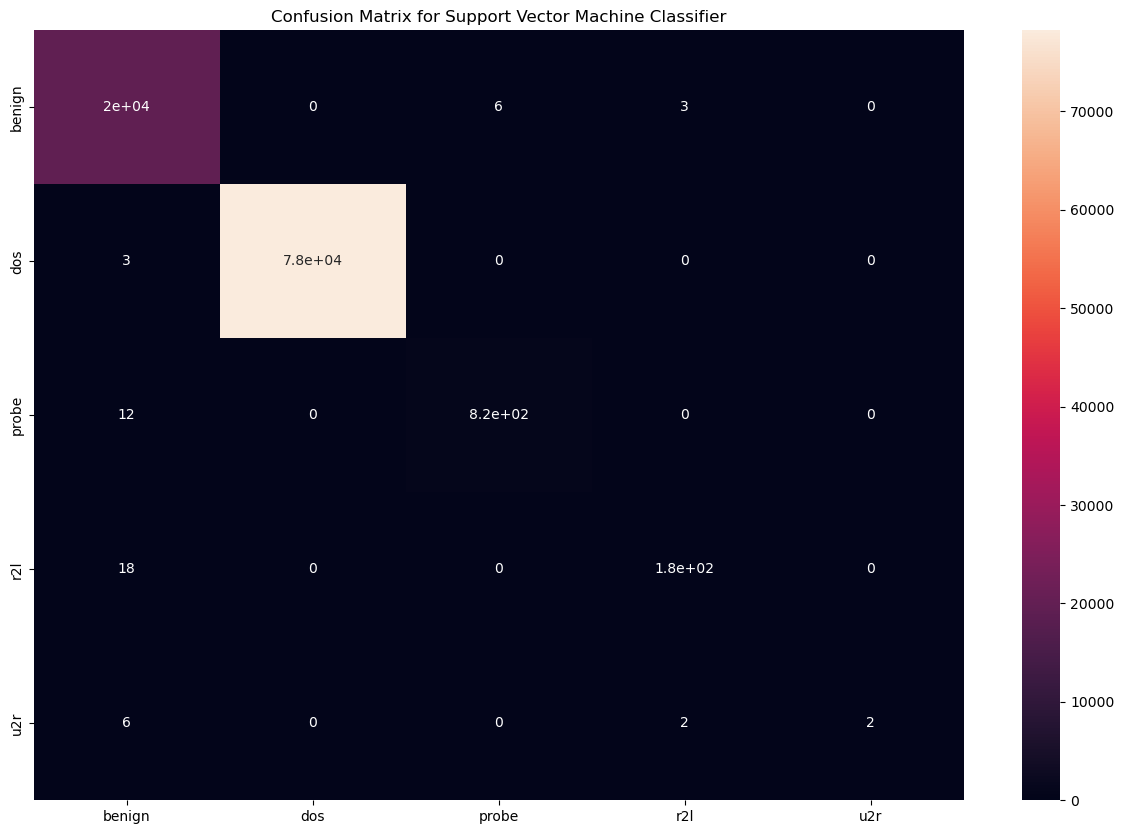

In [42]:
#Confusion Matrix Heatmap
print('Confusion Matrix Heatmap:')
confusion_matrix_from_sv_df = pd.DataFrame(confusion_matrix_from_sv, index = ['benign', 'dos', 'probe', 'r2l', 'u2r'], columns = ['benign', 'dos', 'probe', 'r2l', 'u2r'])
plt.figure(figsize=(15,10))
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
sn.heatmap(confusion_matrix_from_sv_df, annot=True, annot_kws={"size": 10}) # font size
plt.show()

In [43]:
#compute accuracy per label
accuracy_per_label_sv = confusion_matrix_from_sv.astype('float') / confusion_matrix_from_sv.sum(axis=1)[:, np.newaxis]
print('Accuracy per Label: ' + str(accuracy_per_label_sv.diagonal()))

#Compute False Positive Rate per label
tp_sv = np.diag(confusion_matrix_from_sv)
print('True Positive Per Label: ' + str(tp_sv))

fp_sv = np.sum(confusion_matrix_from_sv, axis=0) - tp_sv
print('False Positive Per Label: ' + str(fp_sv))

fn_sv = np.sum(confusion_matrix_from_sv, axis=1) - tp_sv
print('False Negative Per Label: ' + str(fn_sv))

benign_tn = np.sum(confusion_matrix_from_sv) - (tp_sv[0]+ fp_sv[0] + fn_sv[0])
dos_tn = np.sum(confusion_matrix_from_sv) - (tp_sv[1]+ fp_sv[1] + fn_sv[1])
probe_tn = np.sum(confusion_matrix_from_sv) - (tp_sv[2]+ fp_sv[2] + fn_sv[2])
r2l_tn = np.sum(confusion_matrix_from_sv) - (tp_sv[3]+ fp_sv[3] + fn_sv[3])
u2r_tn = np.sum(confusion_matrix_from_sv) - (tp_sv[4]+ fp_sv[4] + fn_sv[4])
print('True Negative Per Label: ' + str([benign_tn, dos_tn, probe_tn, r2l_tn, u2r_tn]))

benign_fpr = fp_sv[0]/ (fp_sv[0] + benign_tn)
dos_fpr = fp_sv[1]/ (fp_sv[1] + dos_tn)
probe_fpr = fp_sv[2]/ (fp_sv[2] + probe_tn)
r2l_fpr = fp_sv[3]/ (fp_sv[3] + r2l_tn)
u2r_fpr = fp_sv[4]/ (fp_sv[4] + u2r_tn)
print('False Positive Rate Per Label: '+ str([benign_fpr, dos_fpr, probe_fpr, r2l_fpr, u2r_fpr]))

#compute classification report
classification_report_sv = classification_report(test_Y, predict_y_using_sv)
print('\n' + 'Classification Report:' + '\n' + str(classification_report_sv) + '\n')

#compute accuracy metric
accuracy_sv = accuracy_score(test_Y, predict_y_using_sv)
print('Accuracy Score = ' + str(accuracy_sv) + '\n')

#compute precision metric
precision_sv = precision_score(test_Y, predict_y_using_sv, average = 'weighted')
print('Precision Score = ' + str(precision_sv) + '\n')

#compute recall metric
recall_sv = recall_score(test_Y, predict_y_using_sv, average = 'weighted')
print('Recall Score = ' + str(recall_sv) + '\n')

#compute F1-score metric
f1_score_sv = f1_score(test_Y, predict_y_using_sv, average = 'weighted')
print('F1 Score = ' + str(f1_score_sv) + '\n')

#compute Total Model built time
sv_built_time = sv_end_time - sv_start_time
print('Model Built Time = ' + str(sv_built_time) + '\n')

#compute overall False positive rate
overall_false_positive_rate_sv = np.sum(fp_sv)/ (np.sum(fp_sv) +np.sum([benign_tn, dos_tn, probe_tn, r2l_tn, u2r_tn]))
print('Overall False Positive Rate = ' + str(overall_false_positive_rate_sv) + '\n')

Accuracy per Label: [0.99953912 0.99996165 0.98564593 0.91133005 0.2       ]
True Positive Per Label: [19519 78224   824   185     2]
False Positive Per Label: [39  0  6  5  0]
False Negative Per Label: [ 9  3 12 18  8]
True Negative Per Label: [79237, 20577, 97962, 98596, 98794]
False Positive Rate Per Label: [0.000491952167112367, 0.0, 6.124448799608035e-05, 5.070942485370331e-05, 0.0]

Classification Report:
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00     19528
         dos       1.00      1.00      1.00     78227
       probe       0.99      0.99      0.99       836
         r2l       0.97      0.91      0.94       203
         u2r       1.00      0.20      0.33        10

    accuracy                           1.00     98804
   macro avg       0.99      0.82      0.85     98804
weighted avg       1.00      1.00      1.00     98804


Accuracy Score = 0.9994939476134569

Precision Score = 0.9994906516265594

Recall Score = 0.999

In [44]:
"""Implementation of Decision Tree Classifier"""

from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(min_samples_leaf=90,splitter= 'random',criterion='gini',random_state=0)
#get model building start time
decision_tree_start_time = dt.datetime.now()
#fit data to classifier
decision_tree_classifier.fit(train_x, train_Y)
#prediction
predict_y_using_decision_tree = decision_tree_classifier.predict(test_x)
#get model building end time
decision_tree_end_time = dt.datetime.now()
#compute confusion matrix
confusion_matrix_from_decision_tree = confusion_matrix(test_Y, predict_y_using_decision_tree)
error = zero_one_loss(test_Y, predict_y_using_decision_tree)
print("Error Rate:",error)

print('\n|  DECISION TREE MODEL  |')
#compute confusion matrix
print('\n' + 'Confusion Matrix:' + '\n' + str(confusion_matrix_from_decision_tree) + '\n')


Error Rate: 0.002489777741791821

|  DECISION TREE MODEL  |

Confusion Matrix:
[[19431    37    13    47     0]
 [   48 78172     7     0     0]
 [   55     5   775     1     0]
 [   23     0     0   180     0]
 [    6     1     0     3     0]]



Confusion Matrix Heatmap:


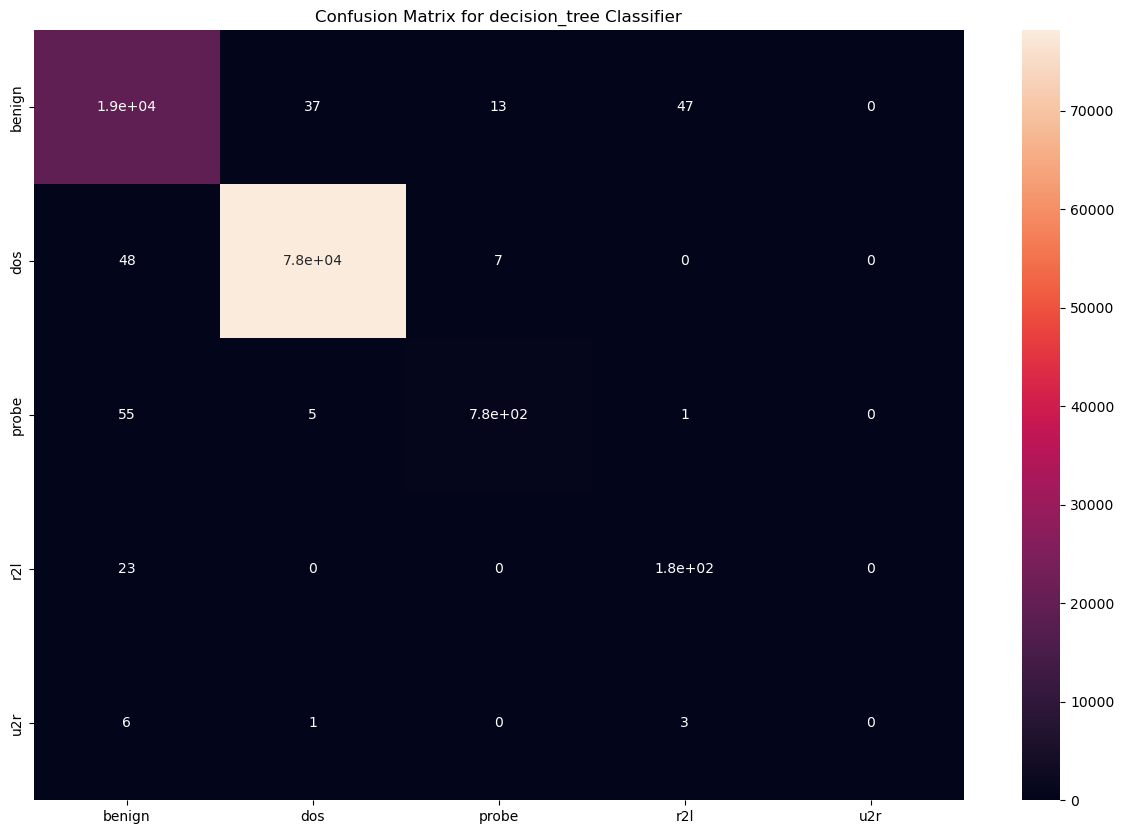

Accuracy per Label: [0.99503277 0.99929692 0.92703349 0.88669951 0.        ]
True Positive Per Label: [19431 78172   775   180     0]
False Positive Per Label: [132  43  20  51   0]
False Negative Per Label: [97 55 61 23 10]
True Negative Per Label: [79144, 20534, 97948, 98550, 98794]
False Positive Rate Per Label: [0.0016650688733033958, 0.0020897118141614424, 0.00020414829332026784, 0.0005172361335077738, 0.0]

Classification Report:
              precision    recall  f1-score   support

      benign       0.99      1.00      0.99     19528
         dos       1.00      1.00      1.00     78227
       probe       0.97      0.93      0.95       836
         r2l       0.78      0.89      0.83       203
         u2r       0.00      0.00      0.00        10

    accuracy                           1.00     98804
   macro avg       0.75      0.76      0.75     98804
weighted avg       1.00      1.00      1.00     98804


Accuracy Score = 0.9975102222582082

Precision Score = 0.9974634623551

In [45]:
#plot confusion matrix heatmap;
print('Confusion Matrix Heatmap:')
confusion_matrix_from_decision_tree_df = pd.DataFrame(confusion_matrix_from_decision_tree, index = ['benign', 'dos', 'probe', 'r2l', 'u2r'], columns = ['benign', 'dos', 'probe', 'r2l', 'u2r'])
plt.figure(figsize=(15,10))
plt.title('Confusion Matrix for decision_tree Classifier')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
sn.heatmap(confusion_matrix_from_decision_tree_df, annot=True, annot_kws={"size": 10}) # font size
plt.show()

#compute accuracy per label
accuracy_per_label_decision_tree = confusion_matrix_from_decision_tree.astype('float') / confusion_matrix_from_decision_tree.sum(axis=1)[:, np.newaxis]
print('Accuracy per Label: ' + str(accuracy_per_label_decision_tree.diagonal()))

#Compute False Positive Rate per label
tp_decision_tree = np.diag(confusion_matrix_from_decision_tree)
print('True Positive Per Label: ' + str(tp_decision_tree))

fp_decision_tree = np.sum(confusion_matrix_from_decision_tree, axis=0) - tp_decision_tree
print('False Positive Per Label: ' + str(fp_decision_tree))

fn_decision_tree = np.sum(confusion_matrix_from_decision_tree, axis=1) - tp_decision_tree
print('False Negative Per Label: ' + str(fn_decision_tree))

benign_tn = np.sum(confusion_matrix_from_decision_tree) - (tp_decision_tree[0]+ fp_decision_tree[0] + fn_decision_tree[0])
dos_tn = np.sum(confusion_matrix_from_decision_tree) - (tp_decision_tree[1]+ fp_decision_tree[1] + fn_decision_tree[1])
probe_tn = np.sum(confusion_matrix_from_decision_tree) - (tp_decision_tree[2]+ fp_decision_tree[2] + fn_decision_tree[2])
r2l_tn = np.sum(confusion_matrix_from_decision_tree) - (tp_decision_tree[3]+ fp_decision_tree[3] + fn_decision_tree[3])
u2r_tn = np.sum(confusion_matrix_from_decision_tree) - (tp_decision_tree[4]+ fp_decision_tree[4] + fn_decision_tree[4])
print('True Negative Per Label: ' + str([benign_tn, dos_tn, probe_tn, r2l_tn, u2r_tn]))

benign_fpr = fp_decision_tree[0]/ (fp_decision_tree[0] + benign_tn)
dos_fpr = fp_decision_tree[1]/ (fp_decision_tree[1] + dos_tn)
probe_fpr = fp_decision_tree[2]/ (fp_decision_tree[2] + probe_tn)
r2l_fpr = fp_decision_tree[3]/ (fp_decision_tree[3] + r2l_tn)
u2r_fpr = fp_decision_tree[4]/ (fp_decision_tree[4] + u2r_tn)
print('False Positive Rate Per Label: '+ str([benign_fpr, dos_fpr, probe_fpr, r2l_fpr, u2r_fpr]))

#compute classification report
classification_report_decision_tree = classification_report(test_Y, predict_y_using_decision_tree)
print('\n' + 'Classification Report:' + '\n' + str(classification_report_decision_tree) + '\n')

#compute accuracy metric
accuracy_decision_tree = accuracy_score(test_Y, predict_y_using_decision_tree)
print('Accuracy Score = ' + str(accuracy_decision_tree) + '\n')

#compute precision metric
precision_decision_tree = precision_score(test_Y, predict_y_using_decision_tree, average = 'weighted')
print('Precision Score = ' + str(precision_decision_tree) + '\n')

#compute recall metric
recall_decision_tree = recall_score(test_Y, predict_y_using_decision_tree, average = 'weighted')
print('Recall Score = ' + str(recall_decision_tree) + '\n')

#compute F1-score metric
f1_score_decision_tree = f1_score(test_Y, predict_y_using_decision_tree, average = 'weighted')
print('F1 Score = ' + str(f1_score_decision_tree) + '\n')

#compute Total Model built time
decision_tree_built_time = decision_tree_end_time - decision_tree_start_time
print('Model Built Time = ' + str(decision_tree_built_time) + '\n')

#compute overall False positive rate
overall_false_positive_rate_decision_tree = np.sum(fp_decision_tree)/ (np.sum(fp_decision_tree) +np.sum([benign_tn, dos_tn, probe_tn, r2l_tn, u2r_tn]))
print('Overall False Positive Rate = ' + str(overall_false_positive_rate_decision_tree) + '\n')


In [46]:
"""Implement Random Forest"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#get model building start time
random_forest_start_time = dt.datetime.now()

#fit data to classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(train_x, train_Y)

RandomForestClassifier(random_state=42)

In [47]:
#prediction
predict_y_using_random_forest = random_forest_classifier.predict(test_x)

In [48]:
#get model building end time
random_forest_end_time = dt.datetime.now()
#compute confusion matrix
confusion_matrix_from_random_forest = confusion_matrix(test_Y, predict_y_using_random_forest)
error = zero_one_loss(test_Y, predict_y_using_random_forest)
print("Error Rate:",error)
print('\n|  RANDOM FOREST MODEL  |')
#compute confusion matrix
print('\n' + 'Confusion Matrix:' + '\n' + str(confusion_matrix_from_random_forest) + '\n')

Error Rate: 0.00020242095461719956

|  RANDOM FOREST MODEL  |

Confusion Matrix:
[[19524     0     1     3     0]
 [    0 78227     0     0     0]
 [    5     0   831     0     0]
 [    5     0     0   197     1]
 [    5     0     0     0     5]]



Confusion Matrix Heatmap:


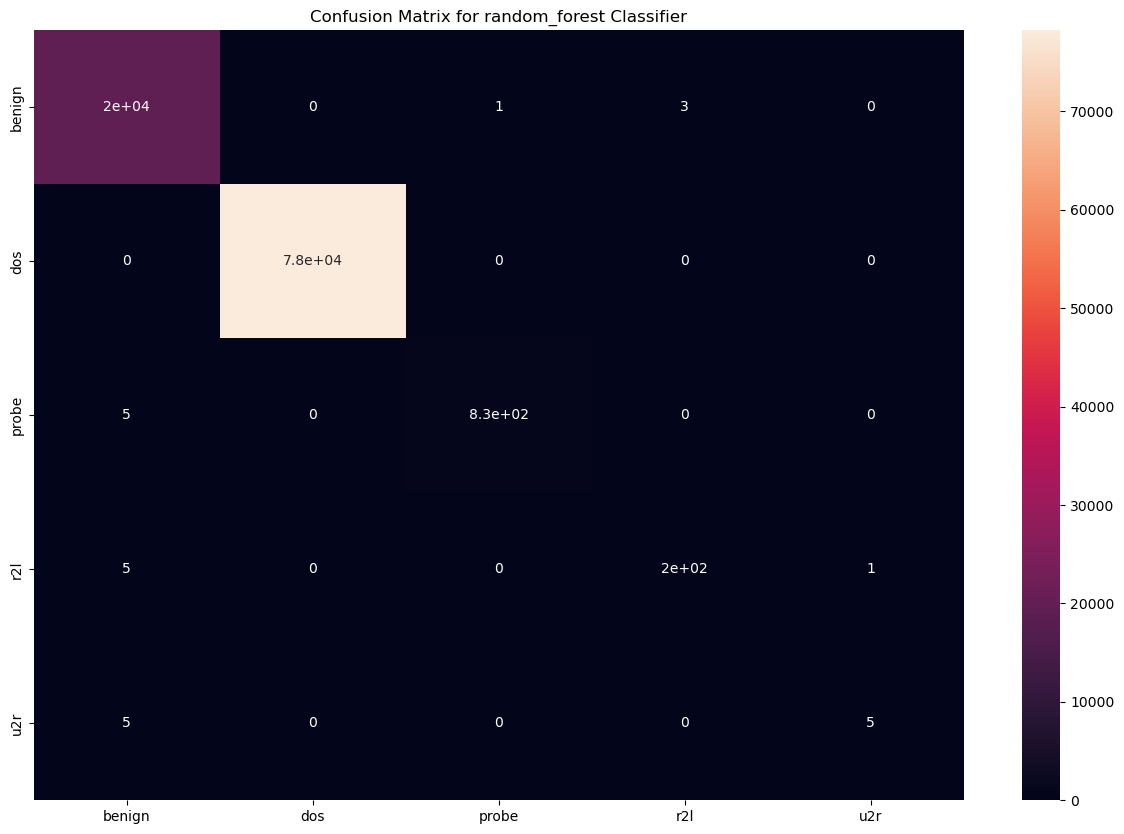

Accuracy per Label: [0.99979517 1.         0.99401914 0.97044335 0.5       ]
True Positive Per Label: [19524 78227   831   197     5]
False Positive Per Label: [15  0  1  3  1]
False Negative Per Label: [4 0 5 6 5]
True Negative Per Label: [79261, 20577, 97967, 98598, 98793]
False Positive Rate Per Label: [0.00018921237196629497, 0.0, 1.0207414666013392e-05, 3.0425654912221985e-05, 1.0122072190618864e-05]

Classification Report:
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00     19528
         dos       1.00      1.00      1.00     78227
       probe       1.00      0.99      1.00       836
         r2l       0.98      0.97      0.98       203
         u2r       0.83      0.50      0.62        10

    accuracy                           1.00     98804
   macro avg       0.96      0.89      0.92     98804
weighted avg       1.00      1.00      1.00     98804


Accuracy Score = 0.9997975790453828

Precision Score = 0.9997904130428948

Re

In [49]:


#plot confusion matrix heatmap;
print('Confusion Matrix Heatmap:')
confusion_matrix_from_random_forest_df = pd.DataFrame(confusion_matrix_from_random_forest, index = ['benign', 'dos', 'probe', 'r2l', 'u2r'], columns = ['benign', 'dos', 'probe', 'r2l', 'u2r'])
plt.figure(figsize=(15,10))
plt.title('Confusion Matrix for random_forest Classifier')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
sn.heatmap(confusion_matrix_from_random_forest_df, annot=True, annot_kws={"size": 10}) # font size
plt.show()

#compute accuracy per label
accuracy_per_label_random_forest = confusion_matrix_from_random_forest.astype('float') / confusion_matrix_from_random_forest.sum(axis=1)[:, np.newaxis]
print('Accuracy per Label: ' + str(accuracy_per_label_random_forest.diagonal()))

#Compute False Positive Rate per label
tp_random_forest = np.diag(confusion_matrix_from_random_forest)
print('True Positive Per Label: ' + str(tp_random_forest))

fp_random_forest = np.sum(confusion_matrix_from_random_forest, axis=0) - tp_random_forest
print('False Positive Per Label: ' + str(fp_random_forest))

fn_random_forest = np.sum(confusion_matrix_from_random_forest, axis=1) - tp_random_forest
print('False Negative Per Label: ' + str(fn_random_forest))

benign_tn = np.sum(confusion_matrix_from_random_forest) - (tp_random_forest[0]+ fp_random_forest[0] + fn_random_forest[0])
dos_tn = np.sum(confusion_matrix_from_random_forest) - (tp_random_forest[1]+ fp_random_forest[1] + fn_random_forest[1])
probe_tn = np.sum(confusion_matrix_from_random_forest) - (tp_random_forest[2]+ fp_random_forest[2] + fn_random_forest[2])
r2l_tn = np.sum(confusion_matrix_from_random_forest) - (tp_random_forest[3]+ fp_random_forest[3] + fn_random_forest[3])
u2r_tn = np.sum(confusion_matrix_from_random_forest) - (tp_random_forest[4]+ fp_random_forest[4] + fn_random_forest[4])
print('True Negative Per Label: ' + str([benign_tn, dos_tn, probe_tn, r2l_tn, u2r_tn]))

benign_fpr = fp_random_forest[0]/ (fp_random_forest[0] + benign_tn)
dos_fpr = fp_random_forest[1]/ (fp_random_forest[1] + dos_tn)
probe_fpr = fp_random_forest[2]/ (fp_random_forest[2] + probe_tn)
r2l_fpr = fp_random_forest[3]/ (fp_random_forest[3] + r2l_tn)
u2r_fpr = fp_random_forest[4]/ (fp_random_forest[4] + u2r_tn)
print('False Positive Rate Per Label: '+ str([benign_fpr, dos_fpr, probe_fpr, r2l_fpr, u2r_fpr]))

#compute classification report
classification_report_random_forest = classification_report(test_Y, predict_y_using_random_forest)
print('\n' + 'Classification Report:' + '\n' + str(classification_report_random_forest) + '\n')

#compute accuracy metric
accuracy_random_forest = accuracy_score(test_Y, predict_y_using_random_forest)
print('Accuracy Score = ' + str(accuracy_random_forest) + '\n')

#compute precision metric
precision_random_forest = precision_score(test_Y, predict_y_using_random_forest, average = 'weighted')
print('Precision Score = ' + str(precision_random_forest) + '\n')

#compute recall metric
recall_random_forest = recall_score(test_Y, predict_y_using_random_forest, average = 'weighted')
print('Recall Score = ' + str(recall_random_forest) + '\n')

#compute F1-score metric
f1_score_random_forest = f1_score(test_Y, predict_y_using_random_forest, average = 'weighted')
print('F1 Score = ' + str(f1_score_random_forest) + '\n')

#compute Total Model built time
random_forest_built_time = random_forest_end_time - random_forest_start_time
print('Model Built Time = ' + str(random_forest_built_time) + '\n')

#compute overall False positive rate
overall_false_positive_rate_random_forest = np.sum(fp_random_forest)/ (np.sum(fp_random_forest) +np.sum([benign_tn, dos_tn, probe_tn, r2l_tn, u2r_tn]))
print('Overall False Positive Rate = ' + str(overall_false_positive_rate_random_forest) + '\n')


In [50]:
"""Compare all algorithm results"""

#get score values for bar chart heights
accuracy_bars = [round(accuracy_sv * 100, 2), round(accuracy_decision_tree * 100, 2), round(accuracy_random_forest * 100, 2)]

precision_bars = [round(precision_sv * 100, 2), round(precision_decision_tree * 100, 2), round(precision_random_forest * 100, 2)]

recall_bars = [round(recall_sv * 100, 2), round(recall_decision_tree * 100, 2), round(recall_random_forest * 100, 2)]

f1_score_bars = [round(f1_score_sv * 100, 2), round(f1_score_decision_tree * 100, 2), round(f1_score_random_forest * 100, 2)]

overall_false_positive_rate_bars = [round(overall_false_positive_rate_sv * 100, 2), round(overall_false_positive_rate_decision_tree * 100, 2), round(overall_false_positive_rate_random_forest * 100, 2)]



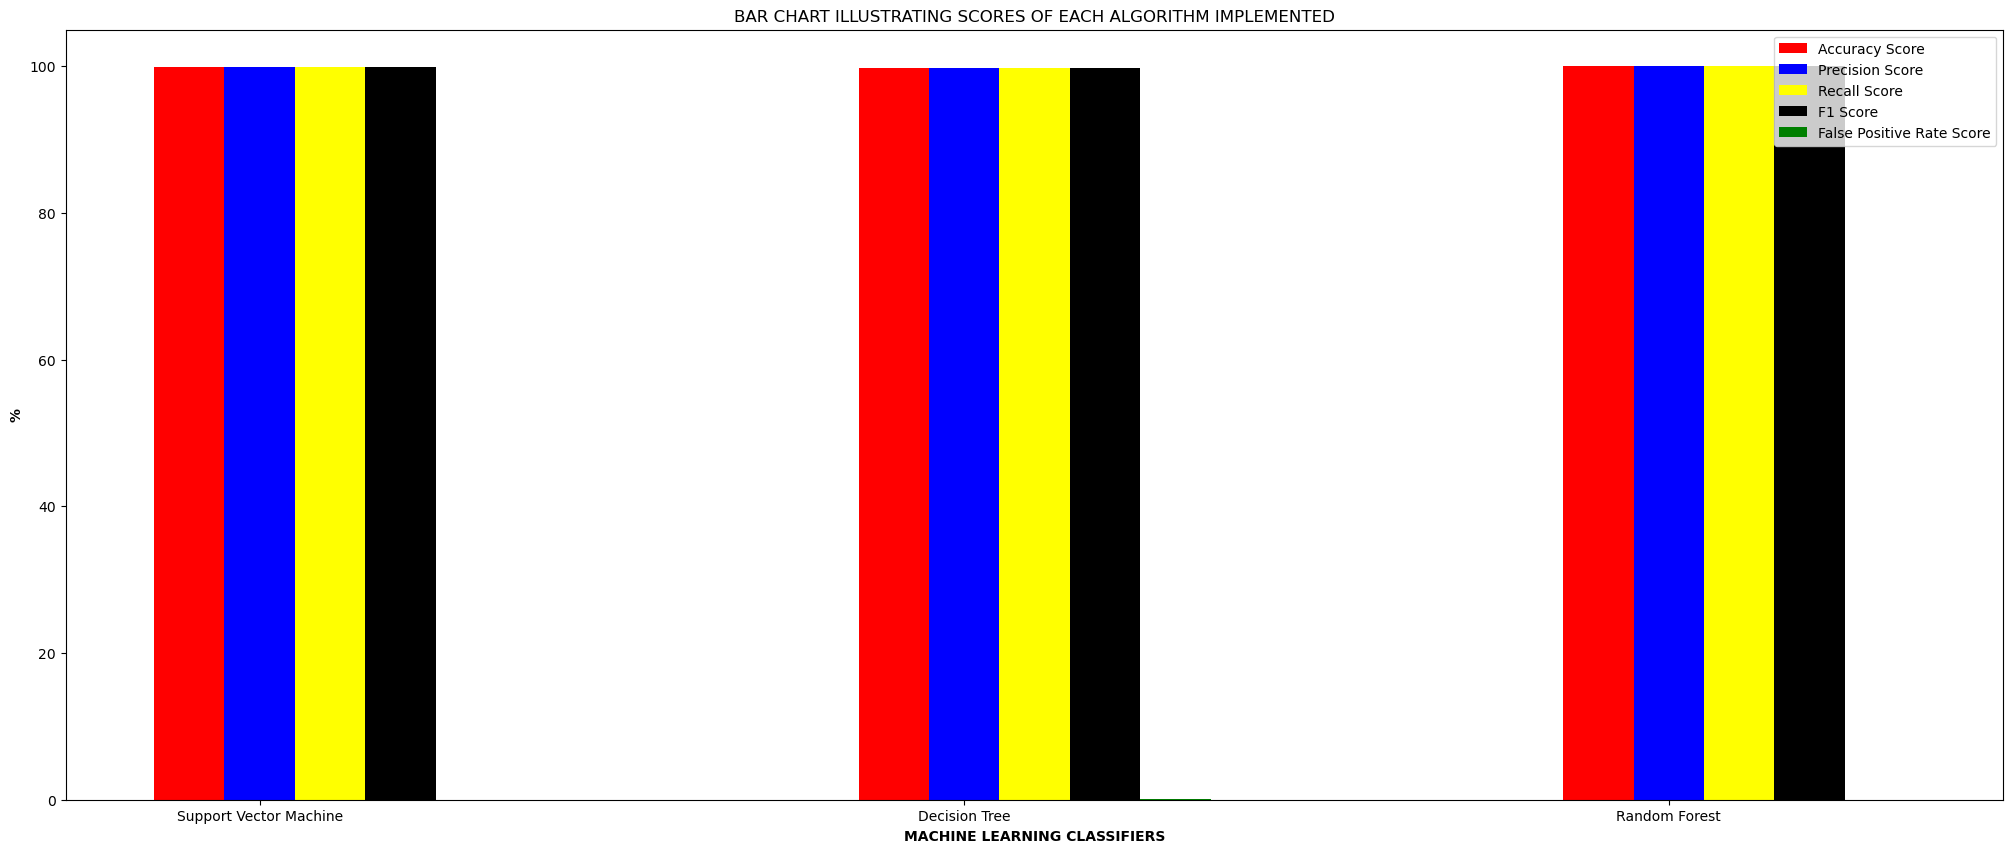

In [51]:
#set bar size
bar_size = 0.10

#bar positioning
position_accuracy = np.arange(len(accuracy_bars))
position_precision = [value + bar_size for value in position_accuracy]
position_recall = [value + bar_size for value in position_precision]
position_f1_score = [value + bar_size for value in position_recall]
position_overall_false_positive_rate = [value + bar_size for value in position_f1_score]

plt.figure(figsize=(25,10))

#plot bars
plt.bar(position_accuracy, accuracy_bars, color = 'red', width = bar_size, label='Accuracy Score')
plt.bar(position_precision, precision_bars, color = 'blue', width = bar_size, label='Precision Score')
plt.bar(position_recall, recall_bars, color = 'yellow', width = bar_size, label='Recall Score')
plt.bar(position_f1_score, f1_score_bars, color = 'black', width = bar_size, label='F1 Score')
plt.bar(position_overall_false_positive_rate, overall_false_positive_rate_bars, color = 'green', width = bar_size, label='False Positive Rate Score')

#Adding Group labels and X-axis labels
# Add xticks on the middle of the group bars
plt.title('BAR CHART ILLUSTRATING SCORES OF EACH ALGORITHM IMPLEMENTED')
plt.xlabel('MACHINE LEARNING CLASSIFIERS', fontweight='bold')
plt.ylabel('%', fontweight='bold')
plt.xticks([algorithms + bar_size for algorithms in range(len(accuracy_bars))], ['Support Vector Machine', 'Decision Tree', 'Random Forest'])

#Display barchart and legend
plt.legend()
plt.show()